# Python: A very brief tour

## David B. Pengra

Everything I know about Python I've learned from reading about it and trying stuff out.  You can do this too. I recommend the [Whirlwind Tour of Python](https://jakevdp.github.io/WhirlwindTourOfPython/) and the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) both by Jake VanderPlas.

Below, I give some examples of aspects of Python as a language and a look at some basic tasks done with **NumPy**, **Matplotlib** and **LMFit** packages.


### In Python, everything is an "object"

That means everything has a **type**, has additional data called **attributes** and internal functions called **methods**.  You can see what these are with the `type()`, `help()` and `dir()` functions.

In [1]:
a = -35.4

In [2]:
type(a)

float

In [3]:
# is_integer() is a Boolean method that retirns true if the floating point number 
# could be replaced with an integer without loss of precision.
#
a.is_integer()

False

### Variables are pointers

But, most basic types are "immutable" so you can't tell.  Immutable means it cannot be changed, so if you try to change it, what you really do is reassign the variable to point to a new object.  

In [4]:
b = a
print(b)

-35.4


In [5]:
a = 5
print(a)
print(b)

5
-35.4


### But...

"Mutable" types can change their contents.  The variable "pointer" points to the structure, not the contents of the mutable structure.  This is most relevant with lists. 

In [6]:
numbers = [1,2,3,4,5,6,7,8, 9.5]
numbers

[1, 2, 3, 4, 5, 6, 7, 8, 9.5]

In [7]:
a = numbers
b = a
print("a =", a)
print("b =", b)

a = [1, 2, 3, 4, 5, 6, 7, 8, 9.5]
b = [1, 2, 3, 4, 5, 6, 7, 8, 9.5]


In [8]:
b[0] = 10
print("a =", a)
print("b =", b)
print("numbers =", numbers)

a = [10, 2, 3, 4, 5, 6, 7, 8, 9.5]
b = [10, 2, 3, 4, 5, 6, 7, 8, 9.5]
numbers = [10, 2, 3, 4, 5, 6, 7, 8, 9.5]


To save the list no a new variable that will not affect the old list, use the copy() method

In [9]:
numbers = [1,2,3,4,5,6,7,8, 9.5]
a = numbers.copy()
b = a
b[0] = 56.2
print("a =", a)
print("b =", b)
print("numbers =", numbers)

a = [56.2, 2, 3, 4, 5, 6, 7, 8, 9.5]
b = [56.2, 2, 3, 4, 5, 6, 7, 8, 9.5]
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9.5]


### The real action is in Python packages

Every notebook will include **NumPy** and **Matplotlib**

In [10]:
# Usually import packages via a handle to the functions in them using import ... as ...
#
import numpy as np
import matplotlib.pyplot as plt
import uncertainties as unc
%matplotlib inline

A NumPy array is really useful. Compare similar operations with the original list.  Numpy arrays allow you to change every element of an array as easily as changing a single vaule.

In [11]:
c = np.array(numbers)
c

array([1. , 2. , 3. , 4. , 5. , 6. , 7. , 8. , 9.5])

In [12]:
print("numbers * 2 = ", numbers * 2)
print("c ** 2 =", c ** 2)

numbers * 2 =  [1, 2, 3, 4, 5, 6, 7, 8, 9.5, 1, 2, 3, 4, 5, 6, 7, 8, 9.5]
c ** 2 = [ 1.    4.    9.   16.   25.   36.   49.   64.   90.25]


Mathematical operations on lists concern concatinations, and in order to work, the operands must be lists.

In [13]:
print("c + 2 =", c + 2)
print("numbers + 2 = ", numbers + 2)

c + 2 = [ 3.   4.   5.   6.   7.   8.   9.  10.  11.5]


TypeError: can only concatenate list (not "int") to list

NumPy functions will often convert numerical lists into NumPy arrays automatically.

In [14]:
print("sin(c) =", np.sin(c))
print("sin(numbers) =", np.sin(numbers))

sin(c) = [ 0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427 -0.2794155
  0.6569866   0.98935825 -0.07515112]
sin(numbers) = [ 0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427 -0.2794155
  0.6569866   0.98935825 -0.07515112]


Look at all of the methods inside a NumPy array!

In [15]:
help(c)

Help on ndarray object:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any objec

## A simple plot with a simple fit

Very basic - like Excel ***trendline***

### Example from physics 331 - Michelson Na fringe-contrast nodes

Readings are from a micrometer position of points that should be linearly spaced.

In [16]:
# Node locations, using extreme limits of where nodes might be, i.e., as far as I can tell
# the first node lies between 15.354 and 15.243 mm.
#
Na_nodes_data = np.array([
    [15.354,15.243],
    [15.611,15.563],
    [15.925,15.856],
    [16.214,16.148],
    [16.485,16.452],
    [16.764,16.748],
    [17.042,17.049],
    [17.335,17.343],
    [17.617,17.643],
    [17.903,17.939],
    [18.178,18.233],
    [18.481,18.534],
    [18.778,18.824]])

To understand the statement below, you need to learn how indexing works in Python.  See **The Whirlwind Tour** (link at top) for more information.

In [17]:
# Find the midpoints
#
Na_nodes = (Na_nodes_data[:,0]+Na_nodes_data[:,1])/2.0
print(Na_nodes)

[15.2985 15.587  15.8905 16.181  16.4685 16.756  17.0455 17.339  17.63
 17.921  18.2055 18.5075 18.801 ]


In [18]:
# Assign a number to each node.  But want the center node to be 0
# The size attribute gives the number of elements in the array.

node_num = np.arange(Na_nodes.size)-Na_nodes.size//2
node_num

array([-6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6])

### Make a plot

With axes labels **(Required!)**

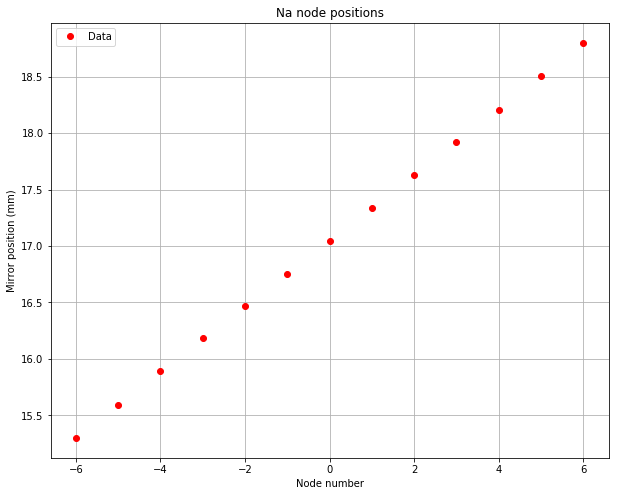

In [19]:
plt.figure(figsize=(10,8))
plt.plot(node_num,Na_nodes,'ro',label="Data")
plt.grid(True)
plt.xlabel('Node number')
plt.ylabel('Mirror position (mm)')
plt.title('Na node positions')
plt.legend();

### Fit a line

Very basic.  Later we'll use something much more powerful.

In [20]:
# The first line does a fit, and returns the fitting coefficients
#
my_coeff = np.polyfit(node_num,Na_nodes,1) # This fits a line (degree-1 polynomial)
#
print(my_coeff)
print('Intercept = {:.4f} mm'.format(my_coeff[1]))
print('Slope = {:.4f} mm/node'.format(my_coeff[0]))


[ 0.29122802 17.04853846]
Intercept = 17.0485 mm
Slope = 0.2912 mm/node


In [21]:
# The poly1d function uses the coefficients and creates a function of them
#
cal = np.poly1d(my_coeff)  # This makes a polynomial function from the coefficients
print(np.poly1d(cal))
cal(2.0)

 
0.2912 x + 17.05


17.6309945054945

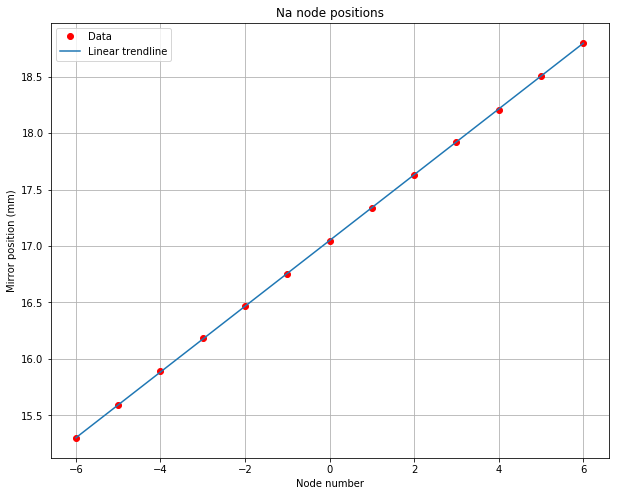

In [22]:
# Now we can add a fitline
#
plt.figure(figsize=(10,8))
plt.plot(node_num,Na_nodes,'ro',label="Data")
plt.plot(node_num,cal(node_num),'-',label="Linear trendline")
plt.grid(True)
plt.xlabel('Node number')
plt.ylabel('Mirror position (mm)')
plt.title('Na node positions')
plt.legend();

## Fit a line using LMFit

LMFit is a very powerful line fitting package that does an especially good job handing data and fit uncertainties.  You should get used to using it because even though running a simple line fit is a little bit more compleicated than what is shown above, you can also run much more complicated fits by making only a few adjustments to the basic procedure.

### Models: the basis of LMFit

LMFit provides a large number of pre-made model functions with predefined parameters. 

To **call a pre-made model**, use:

- `from lmfit.models import ModelFromList` 

where `ModelFromList` may be one or more of the following.  The actual functions and the names of the parameters are also given below.

  - `LinearModel()`
     - $f(x;m,b)=mx+b$
     - m is called 'slope';  b= 'intercept'
  - `QuadraticModel()`
     - $f(x;a,b,c)=ax^2+bx+c$
     - parameters called 'a', 'b', 'c'
  - `PolynomialModel(N)`	polynomial of order N
     - $f(x,;c_0,c_1,c_2,…c_N)=c_0+c_1 x+c_2 x^2+⋯+c_N x^N$
     - parameters called c0, c1, c2, … cN

Think of this as bringing in these as the equivalent of a user-defined function.  To have more than one, you would use:

- `from lmfit.models import LinearModel, QuadraticModel`

There are many more models available, such as peaks, power-law, and logarithmic functions, etc. You can also create and use your own model.  To see examples of these see the extensive examples created by Prof. Olmstead in another notebook.

Then you must creat an instance of the model that has been imported:

- `line0 = LinearModel()` to fit a line to your data

To run the fit, you must first establish starting points for the fit parameters.  For line, polynomials and other realtively simple functions, there is an additional method in the model called `guess()`.  To use this, create parameters with starting values by this line:

- `param_guess = line0.guess(ydata, x=xdata)` where `ydata` is the y-value array and `xdata` is the x-value array. 

Then, to run the fit, you invoke the `fit()` method in the model, and save the results into a **Parameters** object:

- `line_fit0 = line0.fit(ydata, param_guess, x=xdata)` makes the fit and saves the results.

Finally to obtain the values of the parameters, information about how good the fit was, and to make a plot of the fit and data, run the `fit_report()` and `plot()` methods:

- `print(line_fit0.fit_report())` to print out the fit results.
- `line_fit0.plot()` to make a quick plot.

Here is everything needed to do this on the data treated above:

In [23]:
# Import the model.
# You only do this once in a notebook
from lmfit.models import LinearModel

In [24]:
# Make an instance of the model
line0 = LinearModel()

# Create the parameters and guess their starting values
param_guess = line0.guess(Na_nodes, x=node_num)

# Fit the line, and print the results
line_fit0 = line0.fit(Na_nodes, param_guess, x=node_num)
line_fit0

### Include uncertainties (error bars) 

LMFit can easily handle uncertainties in the data set to weight the fit.  From above, we have ranges of where the notes may lie from half the range of each node location.  We can use these to improve our knowledge of the fit quality.

In [25]:
# Find the uncertainty in the node locations from the ranges
#
Na_nodes_unc = abs(Na_nodes_data[:,0]-Na_nodes_data[:,1])/2.0
print(Na_nodes_unc)

[0.0555 0.024  0.0345 0.033  0.0165 0.008  0.0035 0.004  0.013  0.018
 0.0275 0.0265 0.023 ]


Now modify the `fit()` call with a `weights` array equal to the inverse of the uncertanity.

In [26]:
# Fit the line, and print the results with weights
line_fit1 = line0.fit(Na_nodes, param_guess, x=node_num, weights=1/Na_nodes_unc)
line_fit1

Finally, make a plot.

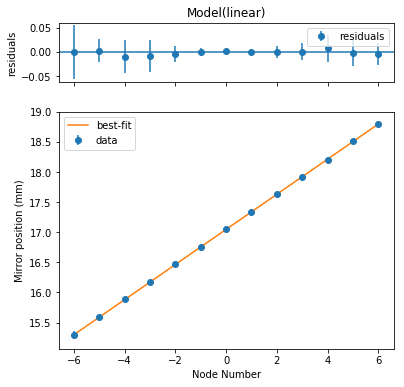

In [27]:
line_fit1.plot()
plt.xlabel('Node Number')
plt.ylabel('Mirror position (mm)');

Notice that if you do not include the weights, you do not get error bars on the plot.  `line_fit0` did not include weights:

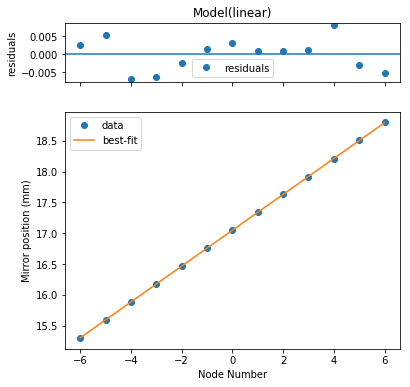

In [28]:
line_fit0.plot()
plt.xlabel('Node Number')
plt.ylabel('Mirror position (mm)');